In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/anshd/foundation of datasciene/combined_data.csv")  # or from Excel

# Count number of mentions per query per day
df_grouped = df.groupby(['date', 'query']).size().unstack(fill_value=0).reset_index()
df_grouped.head()

query,date,RSV,chills,contagious,cough,covid,diarrhea,epidemic,fatigue,fever,flu,illness,pneumonia,rash,vaccine,virus
0,2008-03-03,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2008-03-30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2008-05-22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2008-05-23,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2008-10-23,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [3]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

X = df_grouped.drop(columns=['date'])
y = (X.sum(axis=1) > X.sum(axis=1).median()).astype(int)  # example label: high activity day

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [5]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/72/28/d4dcf1b06761c916f642e0fe1293ed8081ce32991b32eada2212f639433c/shap-0.47.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for numba>=0.54 from https://files.pythonhosted.org/packages/0f/a4/2b309a6a9f6d4d8cfba583401c7c2f9ff887adb5d54d8e2e130274c0973f/numba-0.61.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for llvmlite<0.45,>=0.44.0dev0 from https://files.pythonhosted.org/packages/5f/c6/258801143975a6d09a373f2641237992496e15567b907a4d401839d671b8/llvmlite-0.44.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/489.8 kB ? eta -:--:--
    --------------------------------------- 10.2/489.8 kB ? eta -:--:--
   -- ----

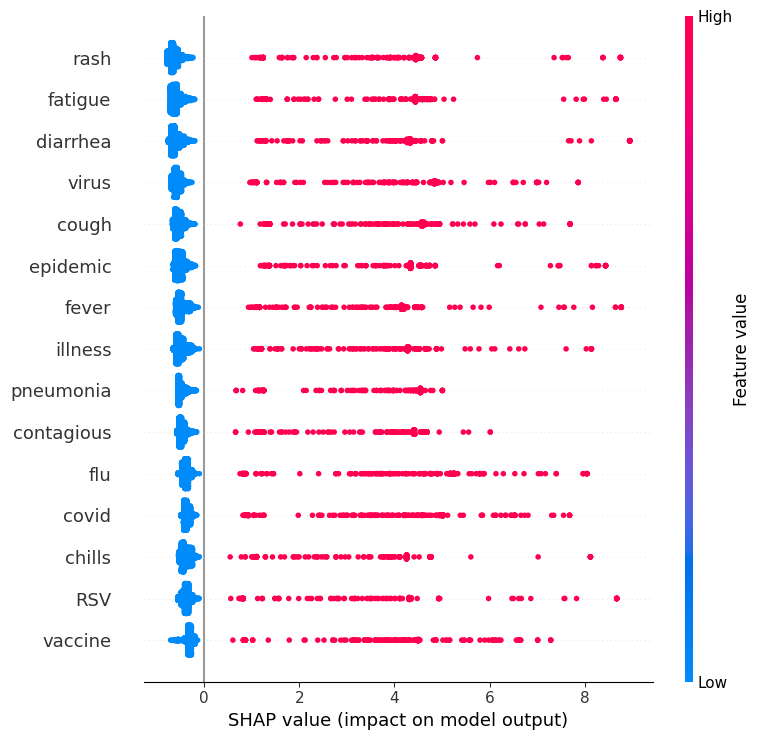

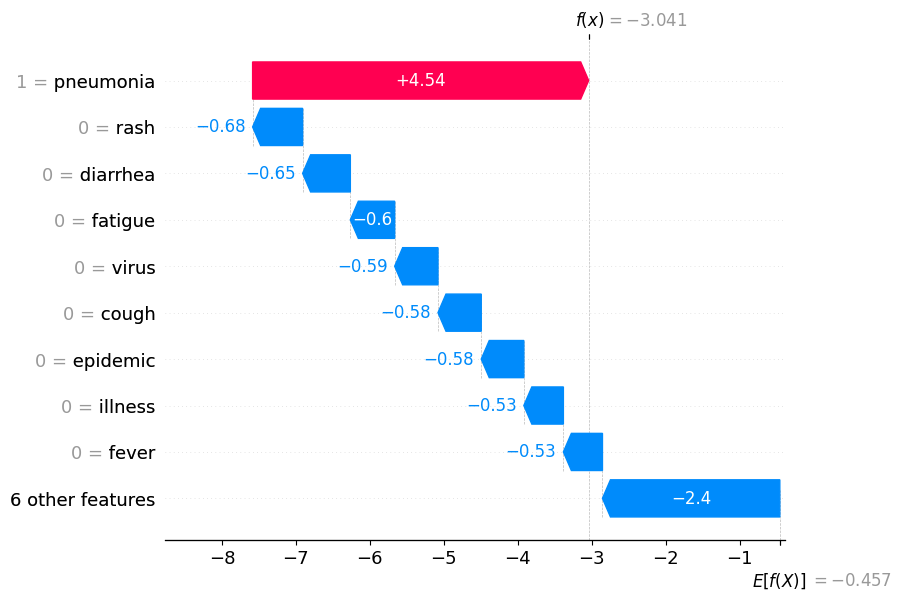

In [6]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X)

# Global feature importance
shap.summary_plot(shap_values, X)

# Local explanation for a specific day
shap.plots.waterfall(shap_values[10], max_display=10)


<Figure size 1000x600 with 0 Axes>

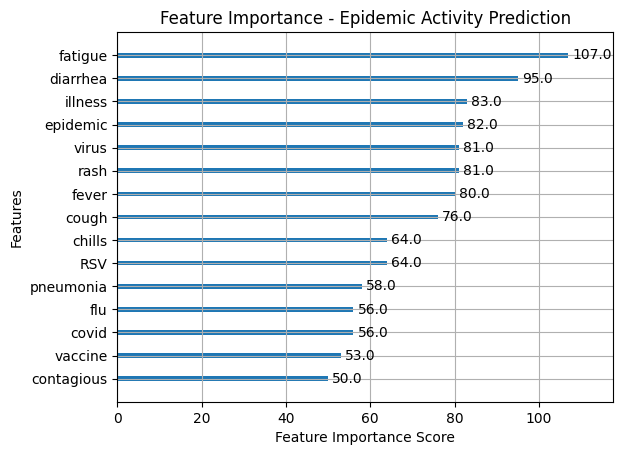

In [10]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(model, importance_type='weight', xlabel='Feature Importance Score')
plt.title("Feature Importance - Epidemic Activity Prediction")
plt.show()